# Logistic regression

In [1]:
from util.functions import impute_and_train
from sklearn.linear_model import LogisticRegression
import pandas as pd

# pass max_iter=1000 to avoid convergence warning
# def impute_and_train(model_constructor, *args, **kwargs):

df_numeric = pd.read_csv('processed/df_numeric.csv')

results = impute_and_train(df_numeric, LogisticRegression, {'max_iter': 1500})

    

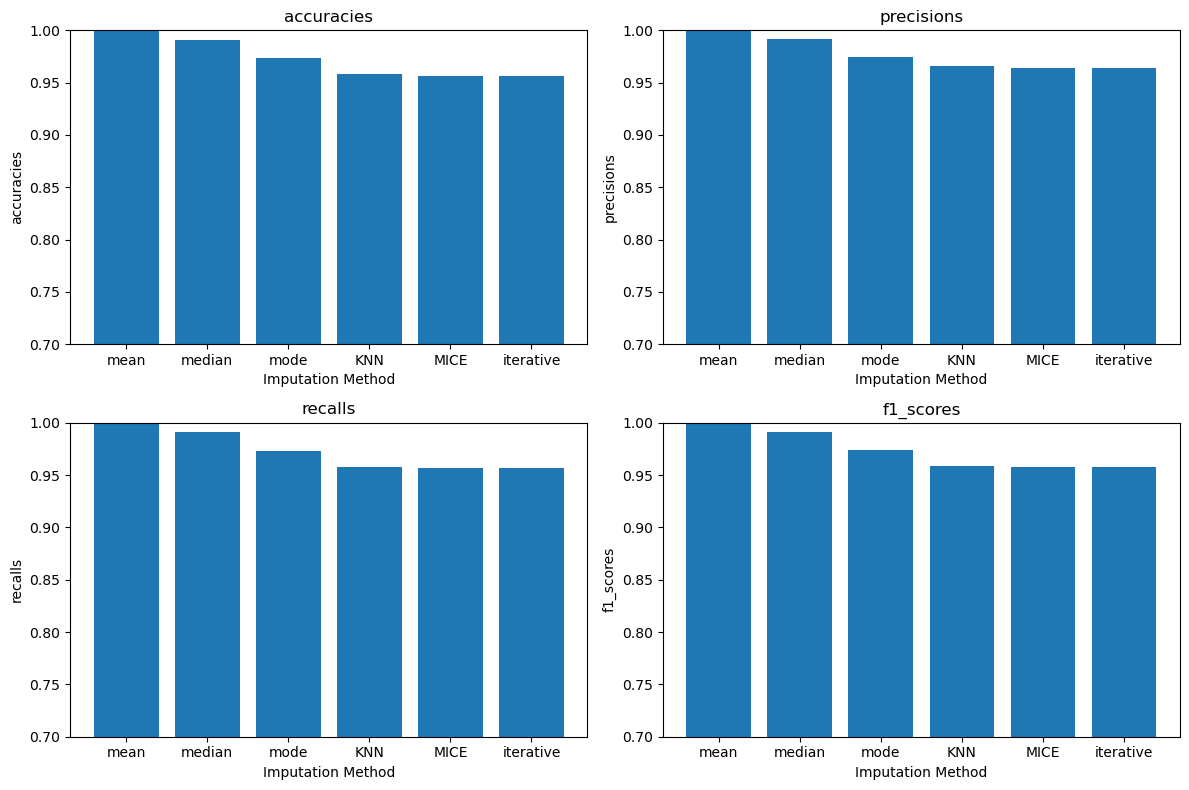

In [3]:
from util.functions import plot_metrics
plot_metrics(results['metrics'])


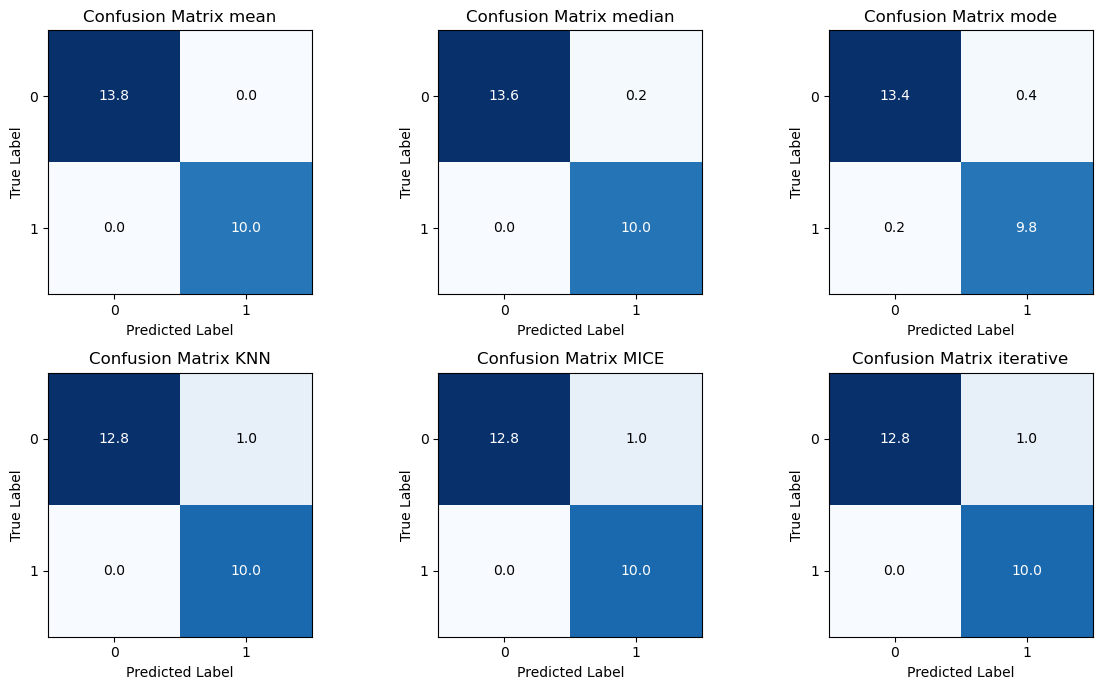

In [4]:
from util.functions import plot_mean_confusion_matrices
plot_mean_confusion_matrices(results['confusion_matrices'])

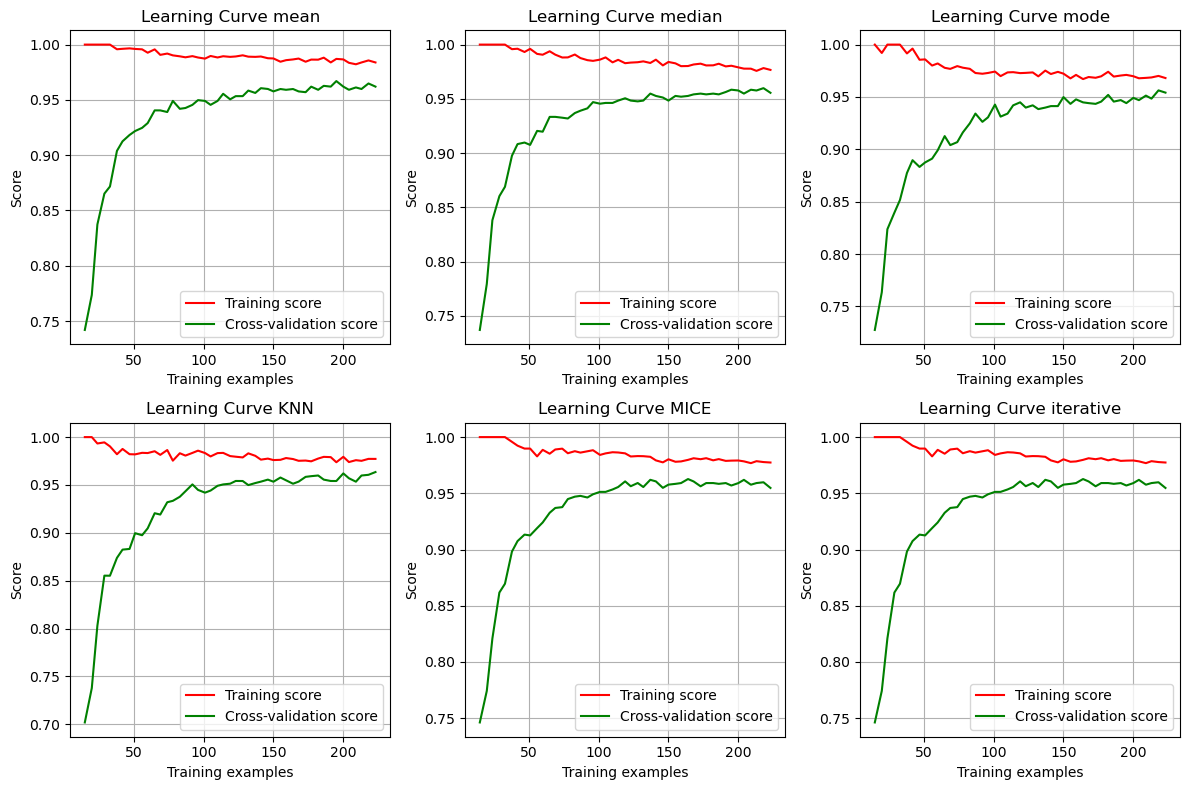

In [5]:
from util.functions import plot_learning_curves
plot_learning_curves(results['learning_curves'])

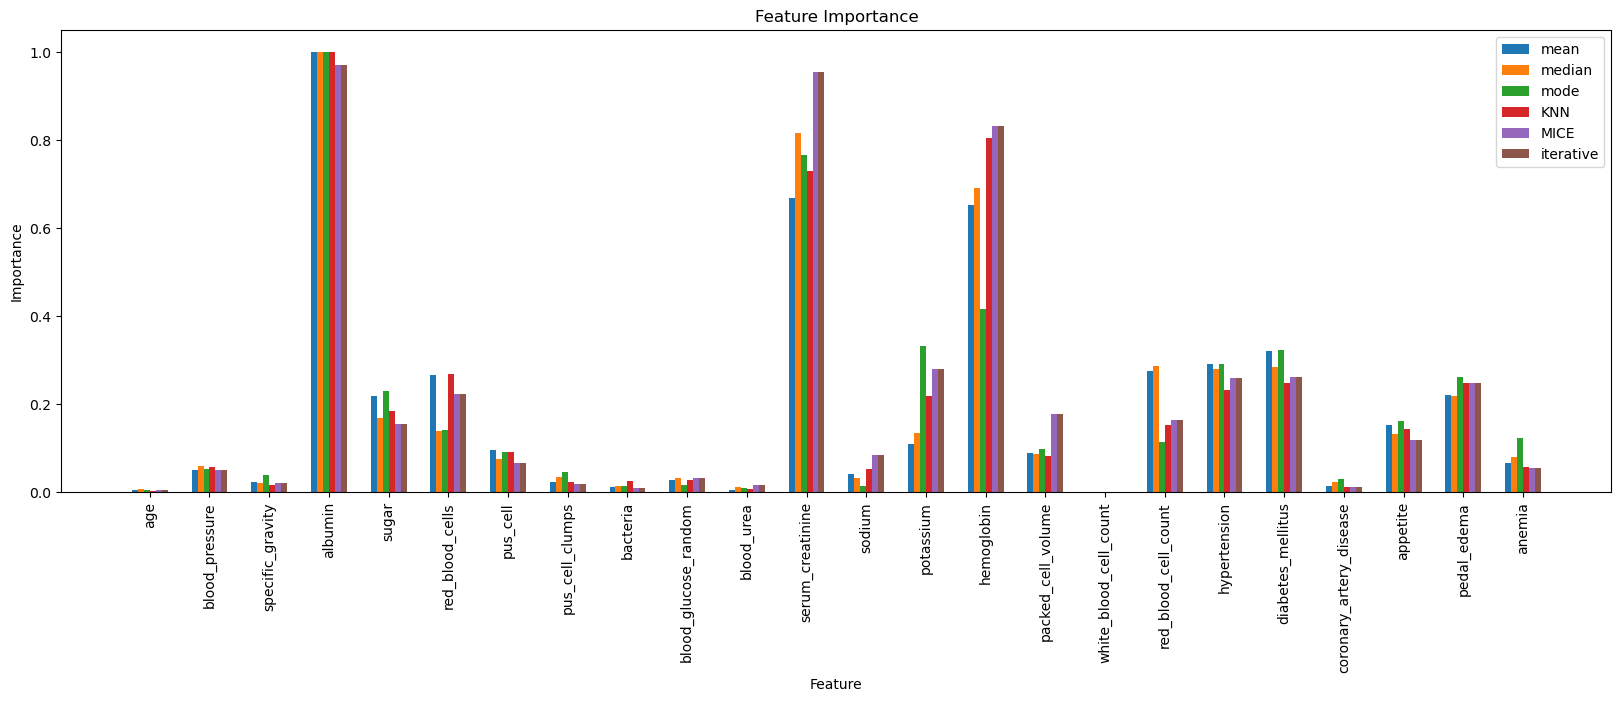

In [6]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from util.functions import plot_feature_importances
import numpy as np
# plot all feature importances as subplots
feature_importances = {}
df_numeric = pd.read_csv('processed/df_numeric.csv')

for (name, models) in results['models'].items():
    norm_coeff = []
    for model in models:
        coefficients = model.coef_[0]
        # Take the absolute values
        abs_coefficients = abs(coefficients)

        # Normalize the absolute coefficients
        scaler = MinMaxScaler()
        normalized_coefficients = scaler.fit_transform(abs_coefficients.reshape(-1, 1)).flatten()
        norm_coeff.append(normalized_coefficients)

    feature_importances[name] = pd.DataFrame({'Importance': np.mean(norm_coeff, axis=0)}, index=df_numeric.drop(columns=['class']).columns)

plot_feature_importances(feature_importances)